## Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
- Привести колонки датафрейма к одному типу данных
- Проверить индекс, чтобы он соответствовал порядку строк
- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
- Рассчитать объемы вводимого жилья по регионам и по годам.
- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
- Визуализировать разброс, связь и распределение этих показателей по регионам
- Сделать выводы по каждому из расчетов и графиков

## Получение dataframe

In [1]:
# import all required libs
import requests
import time
from datetime import datetime
from pprint import pprint
import pandas as pd
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import sqlite3


In [2]:
%%time
# Делаем запрос через API
# Проходим циклом пока в списке сайта есть объекты 
# Формируем список с объектами и далее по нему проходим циклом и записываем информацию по объектам в buildings


session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)

buildings = []
offset = 0
limit = 1000
length = 1


while length > 0:
    start = datetime.now()
    object_list = []
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset}&limit={limit}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = session.get(url)
    res_json = res.json()
    for i in res_json['data']['list']:
        object_list.append(i['objId'])
    offset += limit
    length = len(res_json['data']['list'])
    for i in object_list:
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}'
        res = session.get(url)
        res_json = res.json()
        buildings.append(res_json)
    finish = datetime.now()
    print(f'Кол-во выгруженных домов в датасет - {len(buildings)}', f'время выполнения прохода - {finish - start}')
    

Кол-во выгруженных домов в датасет - 1000 время выполнения прохода - 0:01:23.773237
Кол-во выгруженных домов в датасет - 2000 время выполнения прохода - 0:01:25.026292
Кол-во выгруженных домов в датасет - 3000 время выполнения прохода - 0:01:23.524184
Кол-во выгруженных домов в датасет - 4000 время выполнения прохода - 0:01:24.268794
Кол-во выгруженных домов в датасет - 5000 время выполнения прохода - 0:01:28.445676
Кол-во выгруженных домов в датасет - 6000 время выполнения прохода - 0:01:25.712375
Кол-во выгруженных домов в датасет - 7000 время выполнения прохода - 0:01:26.360091
Кол-во выгруженных домов в датасет - 8000 время выполнения прохода - 0:01:29.284380
Кол-во выгруженных домов в датасет - 9000 время выполнения прохода - 0:01:33.209567
Кол-во выгруженных домов в датасет - 10000 время выполнения прохода - 0:01:22.624279
Кол-во выгруженных домов в датасет - 10567 время выполнения прохода - 0:00:50.048722
Кол-во выгруженных домов в датасет - 10567 время выполнения прохода - 0:00

In [3]:
# Выведем количество объектов недвижимости, которое у нас получилось в итоге
len(buildings)

10567

In [4]:
# Формируем датафрейм с помощью json_normalize и выведем 5 случайных строк
df = pd.json_normalize(buildings)
df.sample(5)

,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,...,data.developer.bankruptStage.bankruptStageDesc,data.developer.bankruptStage.bankruptLawUrl,data.developer.orgBankruptMsgDttm,data.metro.id,data.metro.name,data.metro.line,data.metro.color,data.metro.time,data.metro.isWalk,data.metro.colors
2518,0,45205,561126,13171,СЗ БАЗИСИНВЕСТ,СЗ БАЗИСИНВЕСТ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК БАЗИСИНВЕСТ,0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5623,0,44662,550317,132,СЗ НОВЫЙ ДОМ ПЛЮС,СЗ НОВЫЙ ДОМ ПЛЮС,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК НОВЫЙ ДОМ ПЛЮС,0,10,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10074,0,21141,53171,982,СТРОЙТЕК,СТРОЙТЕК,СТРОЙТЕК,0,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7987,0,47351,603197,11992,СЗ ТОЛМАЧЕВСКИЙ,СЗ ТОЛМАЧЕВСКИЙ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ТОЛМАЧЕВСКИЙ,0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9176,0,44900,540890,5746,СЗКАРЬЕРОУПРАВЛЕНИЕ,СЗКАРЬЕРОУПРАВЛЕНИЕ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИККАРЬЕРОУПРАВЛЕНИЕ,0,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 109 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   errcode                                         object 
 1   data.id                                         int64  
 2   data.pdId                                       int64  
 3   data.developer.devId                            int64  
 4   data.developer.devShortCleanNm                  object 
 5   data.developer.devShortNm                       object 
 6   data.developer.devFullCleanNm                   object 
 7   data.developer.problObjCnt                      int64  
 8   data.developer.buildObjCnt                      int64  
 9   data.developer.comissObjCnt                     int64  
 10  data.developer.regRegionDesc                    object 
 11  data.developer.devPhoneNum                      object 
 12  data.developer.devSite         

У нас достаточно много колонок. В первую очередь приведем в порядок названия колонок и посмотрим на данные, которые в них храняться. Приведем к правильному типу и уберем пропуски. 

## Обработка dataframe

In [6]:
# Функция переименовывает колонки, убирая в названии слова data
def rename_columns(df):
    new_column_list = {}
    old_columns = df.columns
    for col in old_columns:
        if len(col.split('.')) >= 2:
            new_column_list[col] = "_".join(col.split('.')[1:])
    df.rename(columns = new_column_list, inplace = True)

In [7]:
rename_columns(df)

In [8]:
df.head(5)

,errcode,id,pdId,developer_devId,developer_devShortCleanNm,developer_devShortNm,developer_devFullCleanNm,developer_problObjCnt,developer_buildObjCnt,developer_comissObjCnt,...,developer_bankruptStage_bankruptStageDesc,developer_bankruptStage_bankruptLawUrl,developer_orgBankruptMsgDttm,metro_id,metro_name,metro_line,metro_color,metro_time,metro_isWalk,metro_colors
0,0,29679,124647,7424,212-2,212-2,212-2,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь будем по 20 колонок обрабатывать

In [9]:
# Выведем первые 20 колонок
df.iloc[:, :20].head(5)

,errcode,id,pdId,developer_devId,developer_devShortCleanNm,developer_devShortNm,developer_devFullCleanNm,developer_problObjCnt,developer_buildObjCnt,developer_comissObjCnt,developer_regRegionDesc,developer_devPhoneNum,developer_devSite,developer_devEmail,developer_devInn,developer_devOgrn,developer_devKpp,developer_devLegalAddr,developer_devFactAddr,developer_lastRpdId
0,0,29679,124647,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0
1,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",626933.0
2,0,13397,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",626933.0
3,0,13399,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",626933.0
4,0,13398,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",626933.0


In [10]:
df.iloc[:, :20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   errcode                    10567 non-null  object 
 1   id                         10567 non-null  int64  
 2   pdId                       10567 non-null  int64  
 3   developer_devId            10567 non-null  int64  
 4   developer_devShortCleanNm  10567 non-null  object 
 5   developer_devShortNm       10567 non-null  object 
 6   developer_devFullCleanNm   10567 non-null  object 
 7   developer_problObjCnt      10567 non-null  int64  
 8   developer_buildObjCnt      10567 non-null  int64  
 9   developer_comissObjCnt     10567 non-null  int64  
 10  developer_regRegionDesc    10450 non-null  object 
 11  developer_devPhoneNum      10551 non-null  object 
 12  developer_devSite          10567 non-null  object 
 13  developer_devEmail         10557 non-null  obj

У нас есть колонки с некорректными типами данных: errcode, developer_devInn, developer_devOgrn, developer_lastRpdId
Так же есть пропуски, но скорее всего информация о девелопере нам в дальнейшем не понадобиться, поэтому пока заполним пропуски нулями там,
где числа и "Незаполнено" там, где строковые 

In [11]:
fill_dict = {'developer_regRegionDesc': 'Незаполнено',
            'developer_devEmail': 'Незаполнено',
            'developer_devFactAddr': 'Незаполнено',
            'developer_devPhoneNum': 0,
            'developer_lastRpdId': 0}

df.fillna(fill_dict, inplace = True)

In [12]:
df[['errcode', 'developer_devInn', 'developer_devOgrn', 'developer_lastRpdId']] = df[['errcode', 'developer_devInn', 'developer_devOgrn', 'developer_lastRpdId']].astype(int)

In [13]:
# Посмотрим значения мин/макс/среднее
df.iloc[:, :20].describe()

,errcode,id,pdId,developer_devId,developer_problObjCnt,developer_buildObjCnt,developer_comissObjCnt,developer_devInn,developer_devOgrn,developer_lastRpdId
count,10567.0,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,1.056700e+04,1.056700e+04,10567.000000
mean,0.0,38228.203842,392946.392448,7399.620517,0.078168,12.474591,8.926753,5.095217e+09,1.220352e+12,618996.125769
std,0.0,9860.837760,192143.570064,4865.778483,0.942781,25.514240,25.472702,2.430114e+09,5.588218e+11,35245.469848
min,0.0,1259.000000,172.000000,10.000000,0.000000,1.000000,0.000000,1.050087e+08,1.020101e+12,0.000000
25%,0.0,35839.500000,271599.000000,2303.000000,0.000000,2.000000,0.000000,2.634096e+09,1.097797e+12,621642.500000
50%,0.0,41504.000000,464545.000000,7954.000000,0.000000,4.000000,0.000000,5.403034e+09,1.157746e+12,624291.000000
75%,0.0,44865.500000,537863.000000,11979.000000,0.000000,10.000000,6.000000,7.447251e+09,1.197746e+12,626791.000000
max,0.0,47736.000000,628485.000000,14698.000000,22.000000,148.000000,190.000000,9.731059e+09,5.187746e+12,628759.000000


Как видим у нас в столбце errcode только нули. Его можно выкинуть из датафрейма, удалим его вместе с другими после обработки датафрейма

In [14]:
# Следующий срез 20 - 40
df.iloc[:, 20:40].head(5)

,developer_fundGuarantyFlg,developer_devOrgRegRegionCd,developer_devEmplMainFullNm,developer_orgForm_id,developer_orgForm_fullForm,developer_orgForm_shortForm,developer_objGuarantyEscrowFlg,developer_govFundFlg,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm
0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41
1,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,04-08-2022 14:30
2,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,04-08-2022 14:33
3,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,72,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,04-08-2022 14:33
4,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,72,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,04-08-2022 14:33


In [15]:
df.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   developer_fundGuarantyFlg       10567 non-null  int64  
 1   developer_devOrgRegRegionCd     10450 non-null  float64
 2   developer_devEmplMainFullNm     10567 non-null  object 
 3   developer_orgForm_id            10567 non-null  int64  
 4   developer_orgForm_fullForm      10567 non-null  object 
 5   developer_orgForm_shortForm     10567 non-null  object 
 6   developer_objGuarantyEscrowFlg  10567 non-null  int64  
 7   developer_govFundFlg            10567 non-null  int64  
 8   region                          10567 non-null  int64  
 9   address                         10541 non-null  object 
 10  objElemLivingCnt                10567 non-null  int64  
 11  objReady100PercDt               10567 non-null  object 
 12  wallMaterialShortDesc           

In [16]:
fill_dict = {'developer_devOrgRegRegionCd': 0,
            'address': 'Незаполнено',
            'objLkFreePlanDesc': 'Незаполнено'
            }
df.fillna(fill_dict, inplace = True)

In [17]:
# Correct types
df['developer_devOrgRegRegionCd'] = df['developer_devOrgRegRegionCd'].astype(int)
df['objReady100PercDt'] = pd.to_datetime(df['objReady100PercDt'])
df['rpdIssueDttm'] = pd.to_datetime(df['rpdIssueDttm'])

In [18]:
df.iloc[:, 20:40].describe()

,developer_fundGuarantyFlg,developer_devOrgRegRegionCd,developer_orgForm_id,developer_objGuarantyEscrowFlg,developer_govFundFlg,region,objElemLivingCnt,objElemParkingCnt,objSquareLiving
count,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000
mean,0.149049,48.994795,5.035109,0.870919,0.007855,48.699726,189.908394,36.510362,9441.722025
std,0.356154,23.823124,10.634614,0.335306,0.088282,23.150844,235.880613,116.051375,11411.018050
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,4.000000,1.000000,0.000000,26.000000,40.000000,0.000000,2098.980000
50%,0.000000,50.000000,4.000000,1.000000,0.000000,50.000000,124.000000,0.000000,6446.000000
75%,0.000000,72.000000,4.000000,1.000000,0.000000,71.000000,253.000000,0.000000,12492.870000
max,1.000000,92.000000,124.000000,1.000000,1.000000,92.000000,2676.000000,3580.000000,142978.700000


Как видно по этому срезу, у нас нет столбцов с одним и тем же значением


In [19]:
# Следующий срез 40 - 60
df.iloc[:, 40:60].head(5)

,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objectTransportInfo
0,47.2238,38.8513,0,0,Комфорт,30-08-2022 01:22,[],0,normal,1,40800,18,1519.0,0,0,True,0,0,0,[]
1,57.1519,65.5536,1,0,Элитный,30-08-2022 01:22,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6221...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,[]
2,57.1519,65.5544,0,0,Элитный,30-08-2022 01:22,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 6221...",0,normal,1,37201,65,6248.51,70,0,True,0,1,1,[]
3,57.1519,65.5544,0,0,Элитный,30-08-2022 01:22,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 6221...",0,normal,0,34754,0,0.0,0,0,True,0,1,1,[]
4,57.1519,65.5544,0,0,Элитный,30-08-2022 01:22,"[{'objId': 13398, 'pdId': 28141, 'rpdId': 6221...",0,normal,1,37165,43,4812.98,48,0,True,0,1,1,[]


In [20]:
df.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   objLkLatitude              10555 non-null  object
 1   objLkLongitude             10555 non-null  object
 2   objCompensFundFlg          10567 non-null  int64 
 3   objProblemFlg              10567 non-null  int64 
 4   objLkClassDesc             10567 non-null  object
 5   loadDttm                   10567 non-null  object
 6   photoRenderDTO             10567 non-null  object
 7   objGuarantyEscrowFlg       10567 non-null  int64 
 8   objectType                 10567 non-null  object
 9   residentialBuildings       10567 non-null  int64 
 10  newBuildingId              10567 non-null  int64 
 11  objFlatCnt                 10567 non-null  int64 
 12  objFlatSq                  10567 non-null  object
 13  objNonlivElemCnt           10567 non-null  int64 
 14  objSta

In [21]:
fill_dict = {'objLkLatitude': 0,
             'objLkLongitude': 0}
df.fillna(fill_dict, inplace = True)

In [22]:
# Correct types
df[['objLkLatitude', 'objLkLongitude', 'objFlatSq']] = df[['objLkLatitude', 'objLkLongitude', 'objFlatSq']].astype(float)
df['loadDttm'] = pd.to_datetime(df['loadDttm'])

In [23]:
df.iloc[:, 40:60].describe()

,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objGuarantyEscrowFlg,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg
count,10567.000000,10567.000000,10567.000000,10567.0,10567.000000,10567.000000,1.056700e+04,10567.000000,10567.000000,10567.000000,10567.0,10567.000000,10567.000000,10567.000000
mean,53.579052,52.267289,0.109776,0.0,0.847639,0.890603,1.021276e+05,189.908394,9441.722025,40.858900,0.0,0.160878,0.616921,0.905271
std,5.364262,26.123831,0.312625,0.0,0.359388,0.312152,4.877494e+04,235.880613,11411.018050,118.454613,0.0,0.367436,0.486160,0.292854
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.900000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,51.702200,37.456550,0.000000,0.0,1.000000,1.000000,1.159785e+05,40.000000,2098.980000,0.000000,0.0,0.000000,0.000000,1.000000
50%,55.179000,39.842700,0.000000,0.0,1.000000,1.000000,1.220390e+05,124.000000,6446.000000,4.000000,0.0,0.000000,1.000000,1.000000
75%,56.504500,60.514300,0.000000,0.0,1.000000,1.000000,1.254625e+05,253.000000,12492.870000,33.000000,0.0,0.000000,1.000000,1.000000
max,70.894100,150.818800,1.000000,0.0,1.000000,1.000000,2.113298e+06,2676.000000,142978.700000,3774.000000,0.0,1.000000,1.000000,1.000000


Колонки objProblemFlg и objStatus мы можем удалить так как там одни нули 

In [24]:
# Следующий срез 60 - 80
df.iloc[:, 60:80].head(5)

,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer_developerGroupName,developer_companyGroupId,floorMin,floorMax,miniUrl,objFloorCnt,quartography_objLivElem1KCnt,quartography_objLivElem2KCnt,quartography_objLivElem3KCnt,quartography_objLivElem4KCnt,quartography_objLivElemCnt,quartography_objLivElemEntrCnt,quartography_objLivElemEntrFloorAvg,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt
0,False,0,Не нормируется,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,0,B,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,28-02-2023 12:00,"2,8",1.0
2,False,0,B,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,6.0,12.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,12.0,0.0,24.0,35.0,6.0,65.0,4.0,3.0,28-02-2025 12:00,"2,96",1.0
3,False,0,B,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,1.0,1.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28-02-2025 12:00,NaN,0.0
4,False,0,B,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,7.0,10.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10.0,0.0,11.0,19.0,13.0,43.0,3.0,3.0,28-02-2025 12:00,"2,96",1.0


In [25]:
df.iloc[:, 60:80].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   conclusion                           10567 non-null  bool   
 1   objGreenHouseFlg                     10567 non-null  int64  
 2   objEnergyEffShortDesc                10567 non-null  object 
 3   infrastructureIndexValue             10565 non-null  float64
 4   developer_developerGroupName         7787 non-null   object 
 5   developer_companyGroupId             7787 non-null   float64
 6   floorMin                             10564 non-null  float64
 7   floorMax                             10566 non-null  float64
 8   miniUrl                              10530 non-null  object 
 9   objFloorCnt                          10566 non-null  float64
 10  quartography_objLivElem1KCnt         9397 non-null   float64
 11  quartography_objLivElem2KCnt

In [26]:
fill_dict = {'developer_developerGroupName': 'Незаполнено',
             'developer_companyGroupId': 0,
             'floorMin': 0,
             'floorMax': 0,
             'miniUrl': 'Незаполнено',
             'objFloorCnt': 0,
             'quartography_objLivElem1KCnt': 0,
             'quartography_objLivElem2KCnt': 0,
             'quartography_objLivElem3KCnt': 0,
             'quartography_objLivElem4KCnt': 0,
             'quartography_objLivElemCnt': 0,
             'quartography_objLivElemEntrCnt': 0,
             'quartography_objLivElemEntrFloorAvg': 0,
             'objTransferPlanDt': 0,
             'objLivCeilingHeight': 0,
             'objInfrstrPlaygrndCnt': 0
}
df.fillna(fill_dict, inplace = True)

In [27]:
# Correct types
df[['developer_companyGroupId', 'floorMin', 'floorMax']] = df[['developer_companyGroupId', 'floorMin', 'floorMax']].astype(int)
fixtype = ['objFloorCnt', 'quartography_objLivElem1KCnt', 'quartography_objLivElem2KCnt', 'quartography_objLivElem3KCnt', 'quartography_objLivElem4KCnt',
           'quartography_objLivElemCnt','quartography_objLivElemEntrCnt', 'quartography_objLivElemEntrFloorAvg']
df[fixtype] = df[fixtype].astype(int)

df['objTransferPlanDt'] = pd.to_datetime(df['objTransferPlanDt'])

In [28]:
df.iloc[:, 60:80].describe()

,objGreenHouseFlg,infrastructureIndexValue,developer_companyGroupId,floorMin,floorMax,objFloorCnt,quartography_objLivElem1KCnt,quartography_objLivElem2KCnt,quartography_objLivElem3KCnt,quartography_objLivElem4KCnt,quartography_objLivElemCnt,quartography_objLivElemEntrCnt,quartography_objLivElemEntrFloorAvg,objInfrstrPlaygrndCnt
count,10567.000000,10565.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000
mean,0.186051,5.781921,4759.955806,10.478092,12.492855,12.492855,100.701713,61.570361,24.479796,2.926848,189.678717,2.716287,6.344847,1.505063
std,0.389166,2.699228,2993.946257,7.749770,8.413207,8.413207,148.632359,82.132949,42.619146,14.016534,235.771631,3.206258,4.904264,1.722008
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,4.000000,5.000000,5.000000,10.000000,8.000000,0.000000,0.000000,40.000000,1.000000,4.000000,1.000000
50%,0.000000,6.000000,5838.000000,9.000000,11.000000,11.000000,54.000000,38.000000,10.000000,0.000000,124.000000,2.000000,6.000000,1.000000
75%,0.000000,8.000000,6669.000000,16.000000,18.000000,18.000000,130.000000,83.500000,32.000000,0.000000,253.000000,3.000000,9.000000,2.000000
max,1.000000,10.000000,9265.000000,76.000000,76.000000,76.000000,2225.000000,1626.000000,831.000000,439.000000,2676.000000,48.000000,240.000000,20.000000


In [29]:
# Следующий срез 80 - 100
df.iloc[:, 80:100].head(5)

,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer_bankruptStage_bankruptStageCd,developer_bankruptStage_bankruptStageDesc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,11.0,10.0,0.0,5.0,4.0,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,0.0,8.0,7.0,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,4.0,15.0,0.0,3.0,3.0,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.developer_bankruptStage_bankruptStageCd.unique()

array([nan,  7.,  6.,  3.,  4.])

In [31]:
df.iloc[:, 80:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   objInfrstrSportGroundCnt                   10494 non-null  float64
 1   objInfrstrTrashAreaCnt                     10496 non-null  float64
 2   objInfrstrObjPrkngCnt                      10491 non-null  float64
 3   objInfrstrNotObjPrkngCnt                   10484 non-null  float64
 4   objElevatorWheelchairCnt                   10496 non-null  float64
 5   objElevatorPassengerCnt                    10496 non-null  float64
 6   objElevatorCargoCnt                        10496 non-null  float64
 7   soldOutPerc                                7531 non-null   float64
 8   objPriceAvg                                7526 non-null   float64
 9   generalContractorNm                        7253 non-null   object 
 10  nonlivFirstFloor      

Колонки с суфиксом Cnt пропуски заполним нулями и переведем в int. objPriceAvg,  пропуски заполним нулями, и переведем в int

In [32]:
fill_dict = {'objInfrstrSportGroundCnt': 0,
             'objInfrstrTrashAreaCnt': 0,
             'objInfrstrObjPrkngCnt': 0,
             'objInfrstrNotObjPrkngCnt': 0,
             'objElevatorWheelchairCnt': 0,
             'objElevatorPassengerCnt': 0,
             'objElevatorCargoCnt': 0,
             'soldOutPerc': 0,
             'objPriceAvg': 0,
             'generalContractorNm': 'Незаполнено',
             'nonlivFirstFloor': 0,
             'objLkSaleDepEmail': 'Незаполнено',
             'transportDistIndex': 0,
             'transportDistIndexValue': 0,
             'nameObj': 'Незаполнено',
             'greenAreaIndexValue': 0,
             'airQualityIndexValue': 0,
             'complexShortNm': 'Незаполнено',
             'developer_bankruptStage_bankruptStageCd': 0,
             'developer_bankruptStage_bankruptStageDesc': 'Незаполнено'
}
df.fillna(fill_dict, inplace = True)

In [33]:
int_list = ['objInfrstrSportGroundCnt', 'objInfrstrTrashAreaCnt', 'objInfrstrObjPrkngCnt', 'objInfrstrNotObjPrkngCnt','objElevatorWheelchairCnt', 'objElevatorPassengerCnt',
             'objElevatorCargoCnt', 'objPriceAvg', 'nonlivFirstFloor', 'transportDistIndexValue', 'greenAreaIndexValue','airQualityIndexValue','developer_bankruptStage_bankruptStageCd']
df[int_list] = df[int_list].astype(int)

In [34]:
df.iloc[:, 80:100].describe()

,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,nonlivFirstFloor,transportDistIndexValue,greenAreaIndexValue,airQualityIndexValue,developer_bankruptStage_bankruptStageCd
count,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000,1.056700e+04,10567.000000,10567.000000,10567.000000,10567.000000,10567.000000
mean,1.290338,1.317876,48.407400,34.353837,0.399735,2.395571,0.987508,0.335873,7.973938e+04,0.399073,1.037475,0.778083,0.817451,0.042964
std,1.627165,1.321972,85.579251,98.123106,1.376073,3.576700,2.350516,0.362735,1.061697e+05,0.489731,2.447347,2.154865,2.304044,0.443526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.183984,6.640000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,57.000000,25.000000,0.000000,3.000000,1.000000,0.649453,1.046140e+05,1.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,13.000000,1000.000000,1000.000000,25.000000,76.000000,49.000000,1.000000,2.724549e+06,1.000000,10.000000,10.000000,10.000000,7.000000


In [35]:
# Следующий срез 100 - 120
df.iloc[:, 100:120].head(5)

,developer_bankruptStage_bankruptLawUrl,developer_orgBankruptMsgDttm,metro_id,metro_name,metro_line,metro_color,metro_time,metro_isWalk,metro_colors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.iloc[:, 100:120].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   developer_bankruptStage_bankruptLawUrl  102 non-null    object 
 1   developer_orgBankruptMsgDttm            102 non-null    object 
 2   metro_id                                1 non-null      object 
 3   metro_name                              1 non-null      object 
 4   metro_line                              1 non-null      object 
 5   metro_color                             1 non-null      object 
 6   metro_time                              1 non-null      float64
 7   metro_isWalk                            1 non-null      object 
 8   metro_colors                            1 non-null      object 
dtypes: float64(1), object(8)
memory usage: 743.1+ KB


В оставшихся колонках у нас очень мало значений.

In [37]:
#Удаляем лишние колонки из датафрейма
del_list = ['errcode', 'objProblemFlg', 'objStatus', 'developer_bankruptStage_bankruptLawUrl', 'developer_orgBankruptMsgDttm', 'metro_id', 'metro_name', 'metro_line',
           'metro_color', 'metro_time', 'metro_isWalk', 'metro_colors']

df.drop(columns = del_list,  inplace =True )

In [38]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567 entries, 0 to 10566
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   id                                         10567 non-null  int64         
 1   pdId                                       10567 non-null  int64         
 2   developer_devId                            10567 non-null  int64         
 3   developer_devShortCleanNm                  10567 non-null  object        
 4   developer_devShortNm                       10567 non-null  object        
 5   developer_devFullCleanNm                   10567 non-null  object        
 6   developer_problObjCnt                      10567 non-null  int64         
 7   developer_buildObjCnt                      10567 non-null  int64         
 8   developer_comissObjCnt                     10567 non-null  int64         
 9   developer_regRegi

## Визуализация

**Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.**
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
* Визуализировать разброс, связь и распределение этих показателей по регионам
* Сделать выводы по каждому из расчетов и графиков

In [39]:
# Загрузим необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

#### *Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены*

Поскольку мы выше заполняли пропуски нулями для колонки со средней ценой за квадратный метр, а здесь требуется не учитывать эти пропуски. Мы просто отфильтруем датафрейм по условию,
что цена за квадратный метр не равна нулю. Также стоит отметить, что у нас есть нежилая недвижимость, ее мы тоже уберем из датафрейма (objSquareLiving).
Для задания будет достаточно сделать новый датафрейм с колонками: id, objPriceAvg, developer_regRegionDesc, objReady100PercDt, objElemLivingCnt,floorMax,objSquareLiving, objElemParkingCnt

In [40]:
cols = ['id', 'objPriceAvg', 'developer_regRegionDesc', 'objReady100PercDt', 'objElemLivingCnt', 'floorMax', 'objSquareLiving', 'objElemParkingCnt']
df_vis = df[(df['objPriceAvg'] != 0) & (df['objSquareLiving'] != 0)][cols]
df_vis.head(5)

,id,objPriceAvg,developer_regRegionDesc,objReady100PercDt,objElemLivingCnt,floorMax,objSquareLiving,objElemParkingCnt
1,13383,53109,Тюменская область,2022-12-31,68,20,6293.78,31
2,13397,45523,Тюменская область,2024-12-31,65,12,6248.51,0
4,13398,47886,Тюменская область,2024-12-31,43,10,4812.98,0
5,13391,55893,Тюменская область,2022-12-31,44,12,4297.44,41
6,36912,61755,Ставропольский край,2022-12-31,104,10,8295.20,42


In [41]:
# добавим колонки по месяцам и годам
df_vis['month'] = df_vis['objReady100PercDt'].dt.month
df_vis['year'] = df_vis['objReady100PercDt'].dt.year
df_vis.head()

,id,objPriceAvg,developer_regRegionDesc,objReady100PercDt,objElemLivingCnt,floorMax,objSquareLiving,objElemParkingCnt,month,year
1,13383,53109,Тюменская область,2022-12-31,68,20,6293.78,31,12,2022
2,13397,45523,Тюменская область,2024-12-31,65,12,6248.51,0,12,2024
4,13398,47886,Тюменская область,2024-12-31,43,10,4812.98,0,12,2024
5,13391,55893,Тюменская область,2022-12-31,44,12,4297.44,41,12,2022
6,36912,61755,Ставропольский край,2022-12-31,104,10,8295.20,42,12,2022


In [42]:
df_reg = df_vis.groupby('developer_regRegionDesc').mean()
df_reg.head()

,id,objPriceAvg,objElemLivingCnt,floorMax,objSquareLiving,objElemParkingCnt,month,year
developer_regRegionDesc,,,,,,,,
Адыгея Республика,31588.705882,64457.176471,109.058824,8.117647,5203.644706,16.117647,10.588235,2022.882353
Алтай Республика,37655.300000,58022.000000,89.900000,11.400000,4542.385000,3.800000,10.800000,2022.600000
Алтайский край,39660.955882,76303.161765,189.441176,15.588235,9593.829853,13.205882,9.176471,2023.205882
Амурская область,40950.333333,111318.333333,115.190476,11.952381,5936.952381,0.000000,10.142857,2022.857143
Архангельская область,40762.792453,86217.867925,165.849057,10.301887,7273.863774,9.490566,9.113208,2023.245283


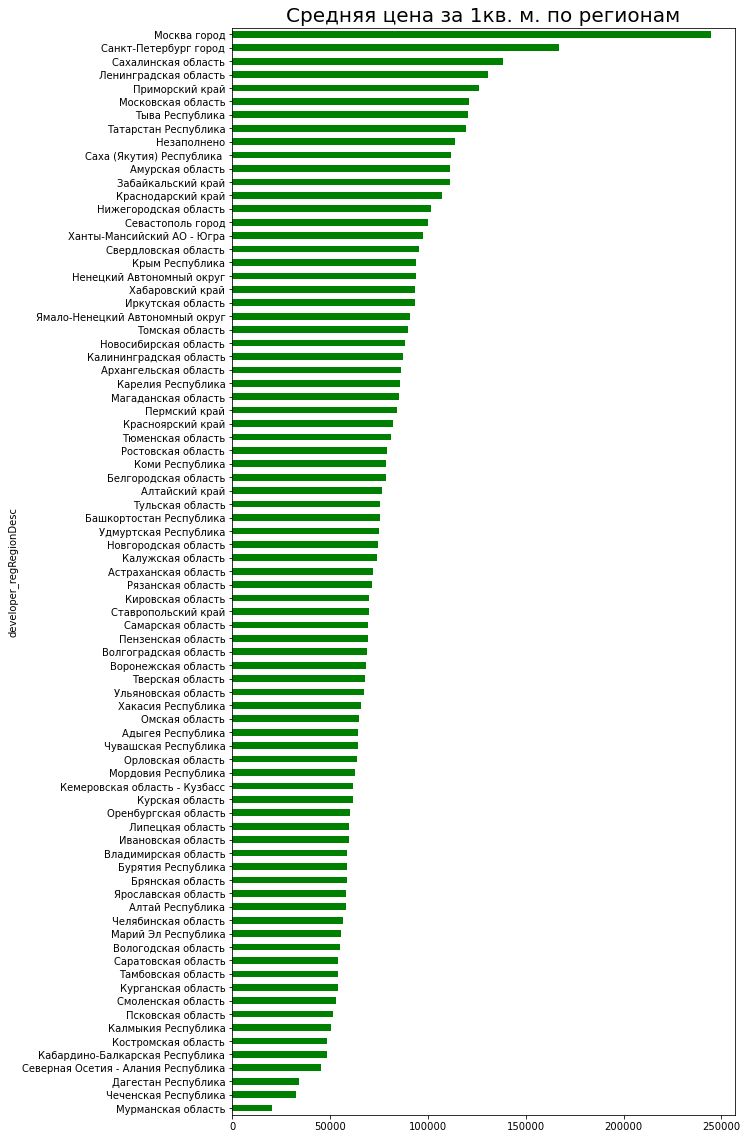

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,20
df_reg['objPriceAvg'].sort_values(ascending = True).plot(kind = 'barh', color = 'Green')
plt.title('Средняя цена за 1кв. м. по регионам', fontdict = {'fontsize': 20})
plt.show()

Средняя цена за квадратный метр выше всех в Москве, самая низкая средняя цена в Мурманской области

#### *Рассчитать объемы вводимого жилья по регионам и по годам.*

In [44]:
new_df = df_vis.groupby(['objReady100PercDt'])['id'].count().reset_index()

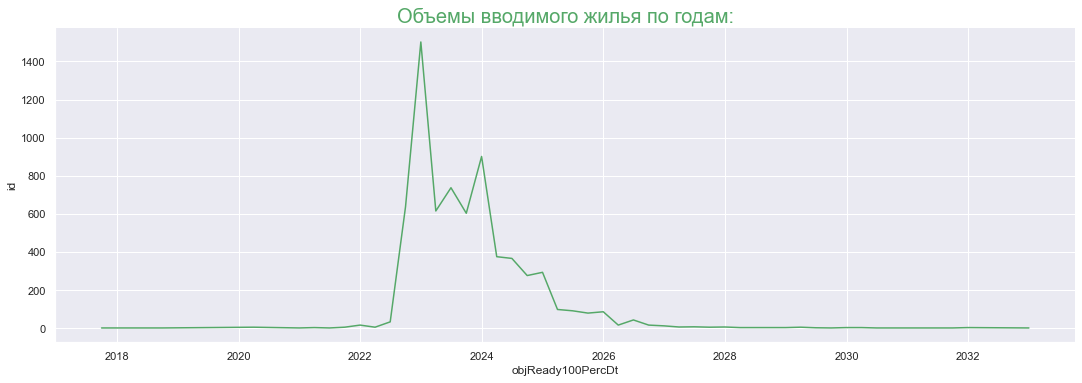

In [45]:
sns.set(style='darkgrid')  
sns.relplot(x='objReady100PercDt',
            y='id',
            data=new_df,
            aspect=3,
            kind='line',
            color = 'g'
            )
plt.title('Объемы вводимого жилья по годам:', size=20, color='g');

У нас 2 максимума в 23м и 24м годах. Посмотрим на распределение по месяцам

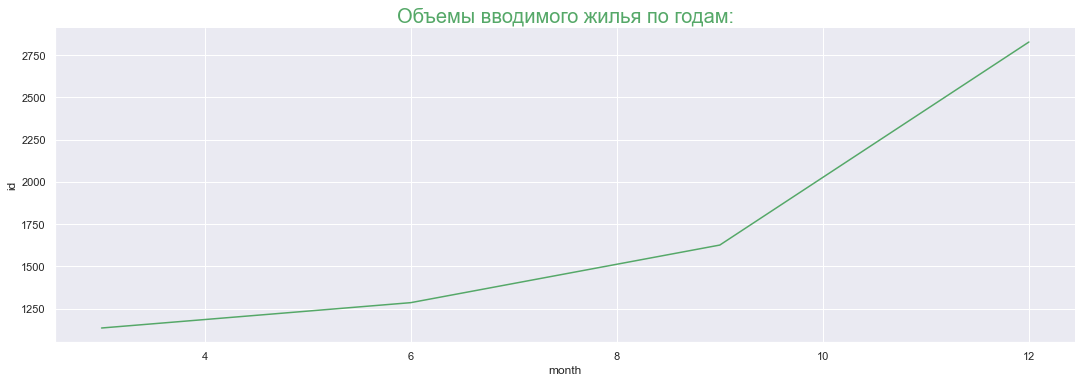

In [46]:
sns.relplot(x='month',
            y='id',
            data=df_vis.groupby('month')['id'].count().reset_index(),
            aspect=3,
            kind='line',
            color = 'g'
            )
plt.title('Объемы вводимого жилья по годам:', size=20, color='g');

Интересно, что пик сдачи жилья приходится на декабрь (чтобы успеть по договору уложиться в год сдачи)
Посмотрим на объемы жилья в регионах

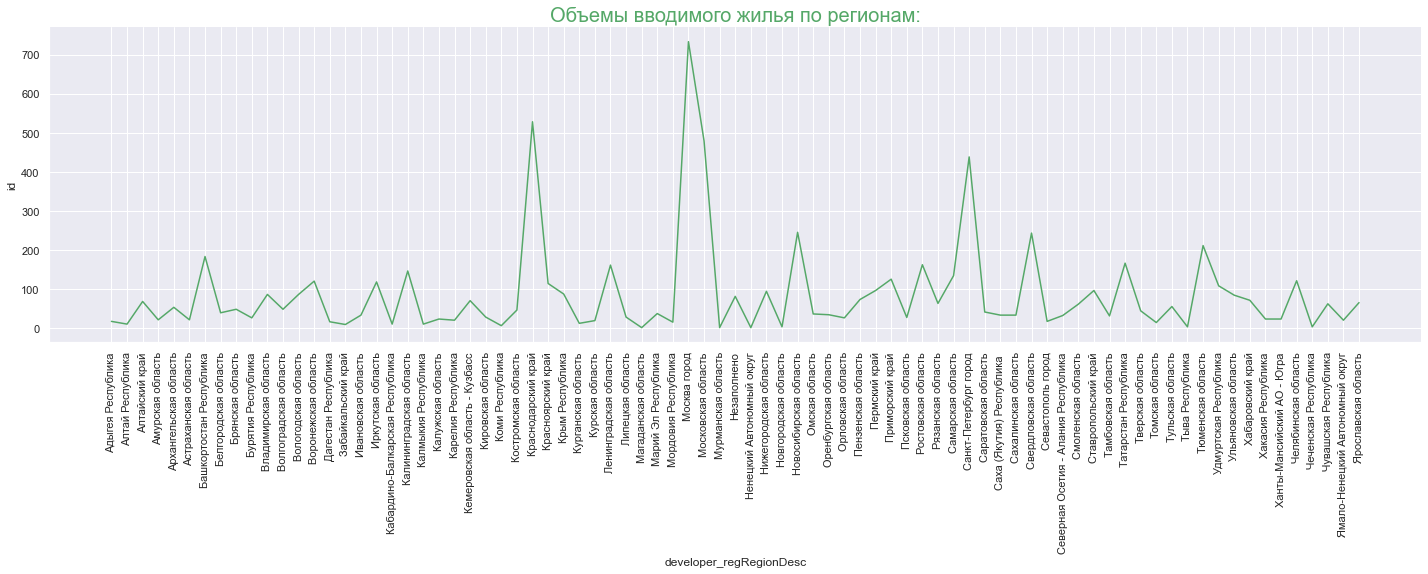

In [47]:
sns.relplot(x='developer_regRegionDesc',
            y='id',
            data=df_vis.groupby('developer_regRegionDesc')['id'].count().reset_index(),
            aspect=4,
            kind='line',
            color = 'g'
            )
plt.xticks(rotation=90)
plt.title('Объемы вводимого жилья по регионам:', size=20, color='g');

На графике мы видим 3 региона с самымии высокими объемами вводимого жилья - Москва, Краснодарский край и Санкт-Петербург. Примечательно, что на третьем месте находится Краснодарский край, а не Московская область или Ленинградская область. 

#### *Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах*

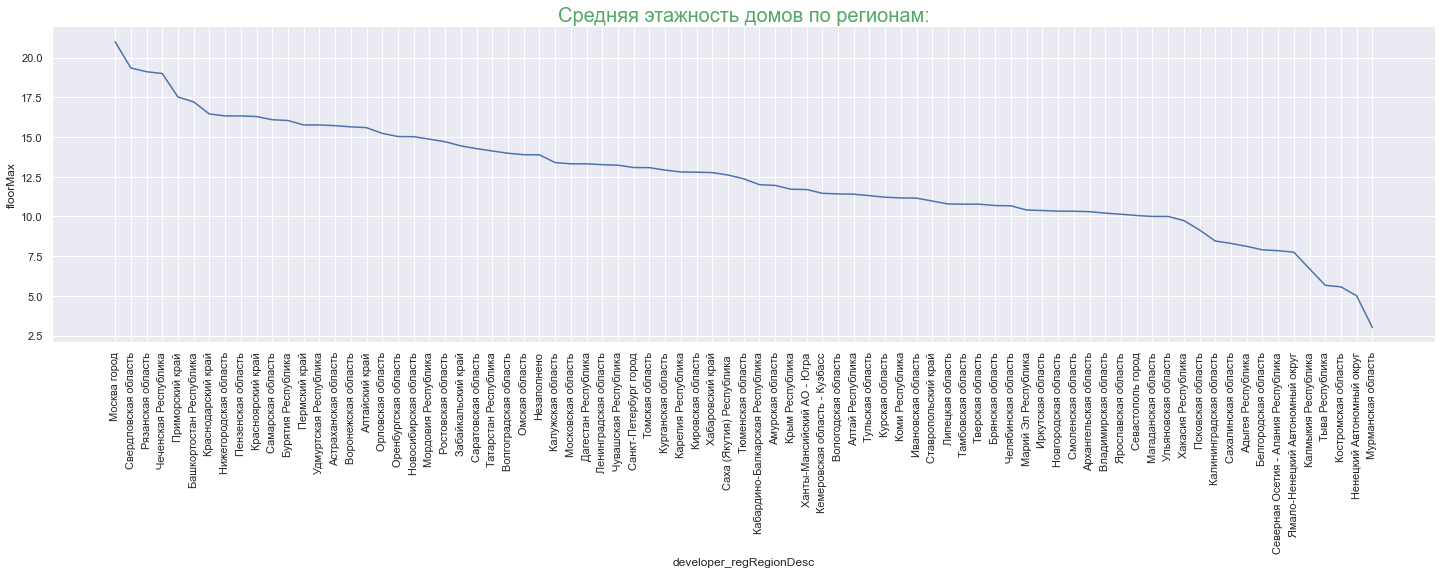

In [48]:
sns.relplot(
    x='developer_regRegionDesc', 
    y='floorMax', 
    data=df_vis.groupby('developer_regRegionDesc')['floorMax'].mean().sort_values(ascending = False).reset_index(), 
    kind='line', 
    aspect=4
) 
plt.xticks(rotation=90)
plt.title('Средняя этажность домов по регионам:', size=20, color='g');

Москва ожидаемо на первом месте по среднему этажности домов. В топ-5 регионов: Москва, Свердловская область, Чеченская республика, Рязанская область, Приморский край.
Топ-5 регионов с самым низким средним значением этажности: Калмыкия республика, Тыва республика, Костромская область, Ненецкий автономный край, Мурманская область

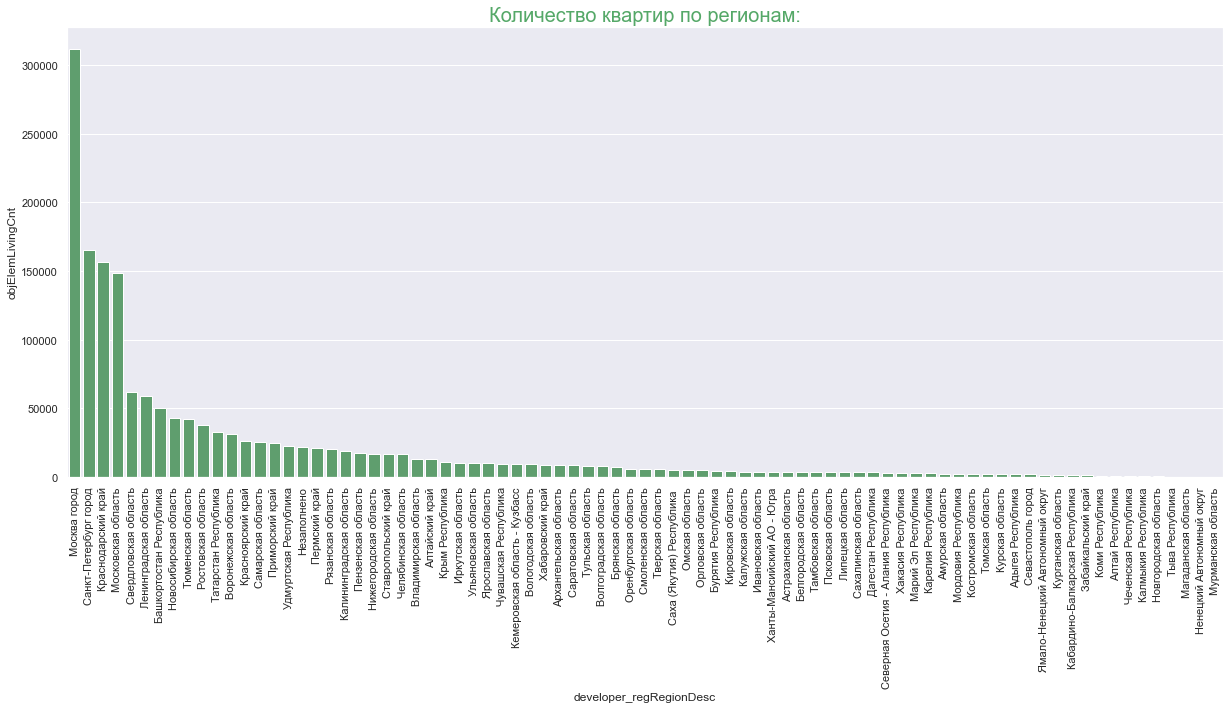

In [49]:
rcParams['figure.figsize'] = 20.7,8.27
sns.barplot(x='developer_regRegionDesc',
            y='objElemLivingCnt',
            data=df_vis.groupby('developer_regRegionDesc')['objElemLivingCnt'].sum().sort_values(ascending = False).reset_index(),
            color = 'g'
           )
plt.xticks(rotation=90)
plt.title('Количество квартир по регионам:', size=20, color='g');

Топ-5 по количеству квартир: Москва, Санкт-Петербург, Краснодарский край, Московская обл. и Свердловская обл.
Топ-5 регионов с самым низким количеством строящихся квартир: Новгородская обл., Республика Тыва, Магаданская обл., Ненецкий АО и Мурманская область

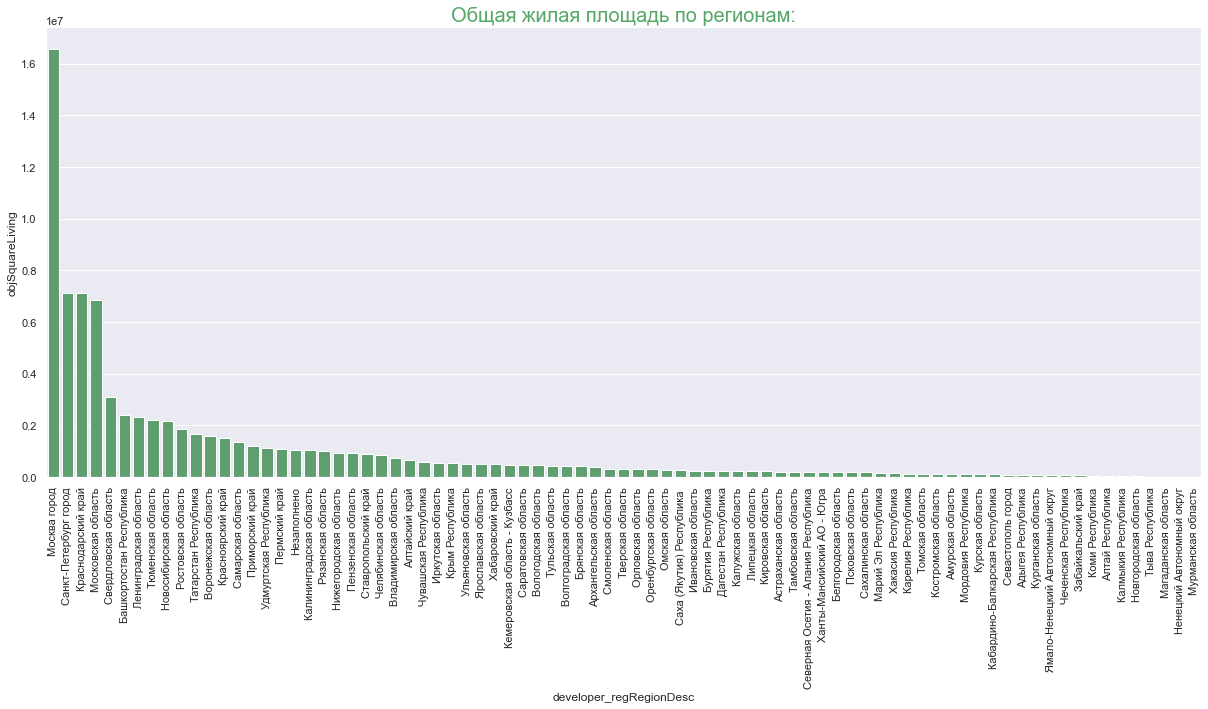

In [50]:
rcParams['figure.figsize'] = 20.7,8.27
sns.barplot(x='developer_regRegionDesc',
            y='objSquareLiving',
            data=df_vis.groupby('developer_regRegionDesc')['objSquareLiving'].sum().sort_values(ascending = False).reset_index(),
            color = 'g'
            )
plt.xticks(rotation=90)
plt.title('Общая жилая площадь по регионам:', size=20, color='g');

Результат в топ лучших и худших регионов не отличается от результата по количеству квартир
Топ-5: Москва, Санкт-Петербург, Краснодарский край, Московская обл. и Свердловская обл.
Топ-5 регионов с самым низким количеством жилой площади: Новгородская обл., Республика Тыва, Магаданская обл., Ненецкий АО и Мурманская область

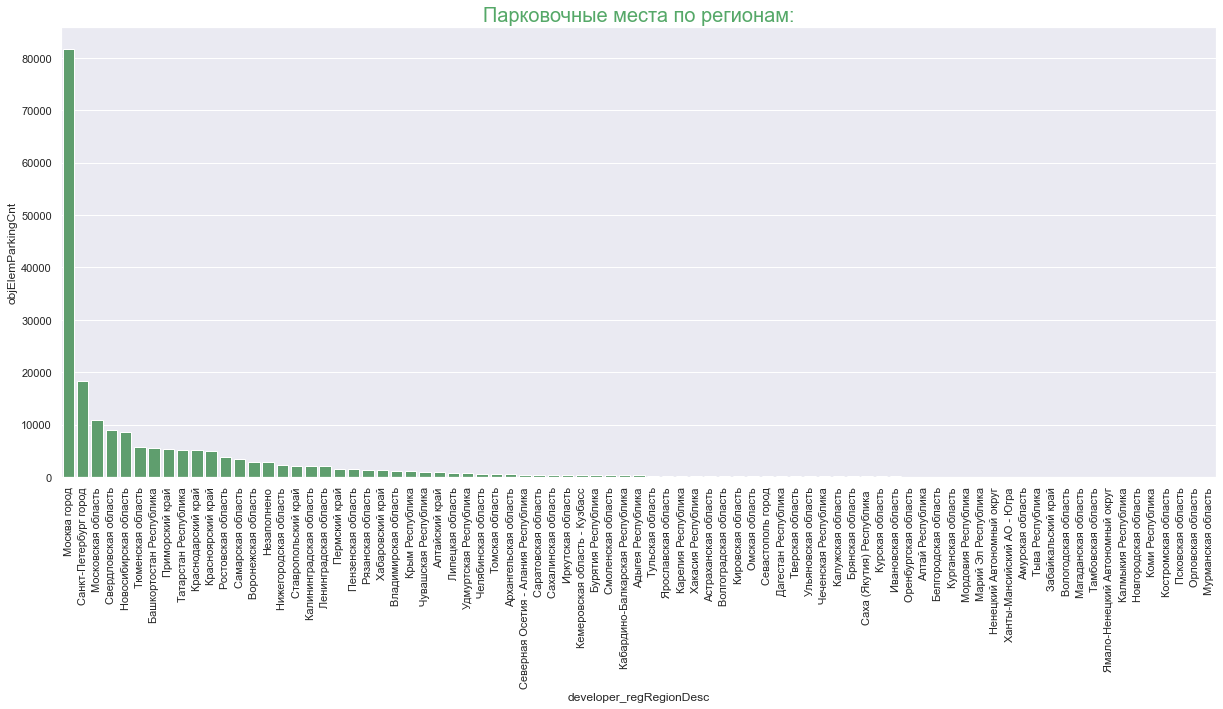

In [51]:
rcParams['figure.figsize'] = 20.7,8.27

sns.barplot(x='developer_regRegionDesc',
            y='objElemParkingCnt',
            data=df_vis.groupby('developer_regRegionDesc')['objElemParkingCnt'].sum().sort_values(ascending = False).reset_index(),
            color = 'g'
            )
plt.xticks(rotation=90)
plt.title('Парковочные места по регионам:', size=20, color='g');

Топ-5 по количеству парковочных мест: Москва, Санкт-Петербург, Московская обл., Свердловская обл. и Новосибирская обл.
Топ-5 регионов с самым низким количеством парковочных мест: Республика Коми, Костромская обл., Псковская обл., Орловская обл. и Мурманская обл.

### *Выводы*

При высоких ценах на квадратный метр в Москве и Санкт-Петербурге хорошо организованны парковочные места. Плюс спрос на жилье в Москве и Питере высокий.
Так же мы видим Краснодарский край, где есть колосальный спрос на жилье, но при этом цены на квадратный метр еще не такие высокие. Это говорит об инвестиционной привлекательности региона.
Основной выпуск жилья нацелен на 23й и 24й годы.